In [1]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Collect data from excel files containing laliga stats of 10 years [2009-2019]

folder = r'C:\Users\lenovo\Suri\python_projects\football\laliga_10years'
all_files = glob(r'C:\Users\lenovo\Suri\python_projects\football\laliga_10years\*.csv')
li = []
for file in all_files:
    df = pd.read_csv(file,index_col=None)
    li.append(df)
laliga = pd.concat(li,axis=0)                                          #Combine data of 10 excel files into a data frame
req_columns = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
               'HTHG','HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF',
               'AF', 'HC', 'AC', 'HY','AY', 'HR', 'AR']                # Keep only columns related to match stats
laliga = laliga[req_columns]

In [3]:
#Create a dataframe containing only Barcelona data of the last 10 years

barca_home = laliga[laliga['HomeTeam'] == 'Barcelona']
barca_away = laliga[laliga['AwayTeam'] == 'Barcelona']

barca_home.rename(columns={'HomeTeam':'H/A','AwayTeam':'Opp','FTHG':'FTG','FTAG':'FTOG',
                           'HTHG':'HTG','HTAG':'HTOG','HS':'S','AS':'OS',
                           'HST':'ST','AST':'OST','HF':'F','AF':'OF',
                           'HC':'C','AC':'OC','HY':'Y','AY':'OY','HR':'R',
                           'AR':'OR'}, inplace = True)
barca_away.rename(columns={'HomeTeam':'Opp','AwayTeam':'H/A','FTHG':'FTOG','FTAG':'FTG',
                           'HTHG':'HTOG','HTAG':'HTG','HS':'OS','AS':'S',
                           'HST':'OST','AST':'ST','HF':'OF','AF':'F',
                           'HC':'OC','AC':'C','HY':'OY','AY':'Y','HR':'OR',
                           'AR':'R'}, inplace = True)

barca_home = barca_home.replace({'H/A':{'Barcelona':'H'}})
barca_home = barca_home.replace({'FTR':{'H':'W','A':'L'}})
barca_home = barca_home.replace({'HTR':{'H':'W','A':'L'}})

barca_away = barca_away.replace({'H/A':{'Barcelona':'A'}})
barca_away = barca_away.replace({'FTR':{'H':'L','A':'W'}})
barca_away = barca_away.replace({'HTR':{'H':'L','A':'W'}})

barca = pd.concat([barca_home,barca_away])

c:\python38\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


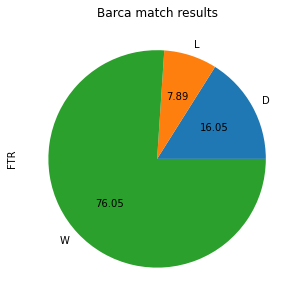

In [7]:
plt.figure(figsize=(5,5))
barca['FTR'].value_counts().sort_index().plot.pie(title='Barca match results',figsize=(5, 5),autopct='%.2f')

In [5]:
#Create a dataframe containing only Real Madrid data of the last 10 years

rm_home = laliga[laliga['HomeTeam'] == 'Real Madrid']
rm_away = laliga[laliga['AwayTeam'] == 'Real Madrid']

rm_home.rename(columns={'HomeTeam':'H/A','AwayTeam':'Opp','FTHG':'FTG','FTAG':'FTOG',
                           'HTHG':'HTG','HTAG':'HTOG','HS':'S','AS':'OS',
                           'HST':'ST','AST':'OST','HF':'F','AF':'OF',
                           'HC':'C','AC':'OC','HY':'Y','AY':'OY','HR':'R',
                           'AR':'OR'}, inplace = True)
rm_away.rename(columns={'HomeTeam':'Opp','AwayTeam':'H/A','FTHG':'FTOG','FTAG':'FTG',
                           'HTHG':'HTOG','HTAG':'HTG','HS':'OS','AS':'S',
                           'HST':'OST','AST':'ST','HF':'OF','AF':'F',
                           'HC':'OC','AC':'C','HY':'OY','AY':'Y','HR':'OR',
                           'AR':'R'}, inplace = True)

rm_home = rm_home.replace({'H/A':{'RealMadrid':'H'}})
rm_home = rm_home.replace({'FTR':{'H':'W','A':'L'}})
rm_home = rm_home.replace({'HTR':{'H':'W','A':'L'}})

rm_away = rm_away.replace({'H/A':{'Real_Madrid':'A'}})
rm_away = rm_away.replace({'FTR':{'H':'L','A':'W'}})
rm_away = rm_away.replace({'HTR':{'H':'L','A':'W'}})

rm = pd.concat([rm_home,rm_away])

c:\python38\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


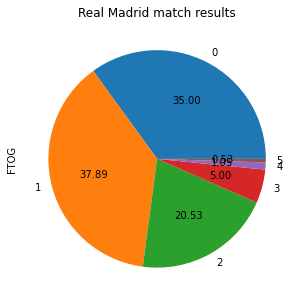

In [15]:
plt.figure(figsize=(5,5))
rm['FTOG'].value_counts().sort_index().plot.pie(title='Real Madrid match results',figsize=(5, 5),autopct='%.2f')

In [16]:
rm.describe()

,FTG,FTOG,HTG,HTOG,S,OS,ST,OST,F,OF,C,OC,Y,OY,R,OR
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.692105,1.007895,1.236842,0.447368,18.581579,10.707895,7.515789,3.600000,12.371053,14.752632,6.463158,4.381579,2.115789,2.802632,0.121053,0.144737
std,1.786032,0.967788,1.123841,0.641460,5.920420,4.344218,3.015748,2.122377,4.124283,4.553623,3.060724,2.435268,1.392503,1.515267,0.334599,0.387943
min,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,1.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,14.000000,8.000000,5.750000,2.000000,9.000000,11.000000,4.000000,3.000000,1.000000,2.000000,0.000000,0.000000
50%,3.000000,1.000000,1.000000,0.000000,18.000000,10.500000,7.000000,3.000000,12.000000,14.000000,6.000000,4.000000,2.000000,3.000000,0.000000,0.000000
75%,4.000000,2.000000,2.000000,1.000000,22.000000,13.000000,10.000000,5.000000,15.000000,18.000000,8.000000,6.000000,3.000000,4.000000,0.000000,0.000000
max,10.000000,5.000000,5.000000,3.000000,39.000000,27.000000,18.000000,13.000000,30.000000,27.000000,17.000000,14.000000,7.000000,8.000000,2.000000,2.000000
